In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score

In [2]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline

In [3]:
os.getcwd()

'C:\\Users\\ilker'

In [4]:
os.chdir('C:\\Users\\ilker\\Desktop\\aydotask')

In [5]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 3092-D2CF

 Directory of C:\Users\ilker\Desktop\aydotask

03/02/2016  03:37 PM    <DIR>          .
03/02/2016  03:37 PM    <DIR>          ..
03/02/2016  03:36 PM         7,955,649 data.csv
               1 File(s)      7,955,649 bytes
               2 Dir(s)  31,625,490,432 bytes free


In [6]:
data = pd.read_csv('data.csv',index_col=0)

In [7]:
data.head()

,feature1,feature2,feature3,feature4,feature5,response
feature0,,,,,,
0,79.238912,142.521180,83.203680,37.251610,-10.135911,0
1,57.399469,74.782256,12.070260,34.322600,55.482167,1
2,33.516311,76.885951,33.253356,48.988555,69.364048,2
3,32.935693,86.202320,48.548763,42.298201,34.603077,2
4,75.350393,138.191571,75.757699,30.216984,-9.227141,0


In [8]:
y = data['response']

In [9]:
y.describe()

count    101010.000000
mean          1.000000
std           0.816501
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max           2.000000
Name: response, dtype: float64

In [10]:
X = data[[0,1,2,3,4]]

In [11]:
X.shape

(101010, 5)

In [12]:
y.shape

(101010L,)

In [13]:
X.describe()

,feature1,feature2,feature3,feature4,feature5
count,101010.000000,101010.000000,101010.000000,101010.000000,101010.000000
mean,55.260527,98.095357,156.296064,38.419451,17.517145
std,315.326145,319.631928,31835.520972,36.054187,318.906931
min,0.016221,14.914621,-32.369763,-21.224100,-62.965050
25%,36.221386,68.220958,18.506533,25.065156,-7.484190
50%,50.517651,83.271721,62.100800,36.333816,20.837380
75%,73.552712,137.111876,77.102605,51.228244,38.001835
max,99999.000000,101010.000000,10111000.000000,9999.000000,101010.000000


In [14]:
from pandas.tools.plotting import scatter_matrix

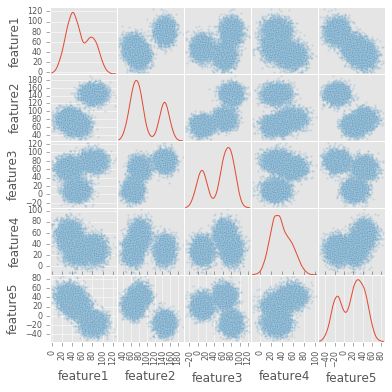

In [15]:
scatter_matrix(X[1:10000], alpha=0.2, figsize=(6, 6), diagonal='kde');

In [17]:
rf_model = RandomForestClassifier(n_estimators=1000, # Number of trees
                                  max_features=5,    # Num features considered
                                  oob_score=True)

In [18]:
clf = RandomForestClassifier(n_estimators=10, max_depth=None,
    min_samples_split=1, random_state=0)
scores = cross_val_score(clf, X, y,cv=5)
scores.mean()

0.99777249777249766

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [20]:
fitted = clf.fit(X_train,y_train)

In [23]:
from sklearn.metrics import confusion_matrix

In [24]:
confusion_matrix(y_test,fitted.predict(X_test),labels=[0, 1, 2])

array([[11061,     0,     1],
       [    0, 11088,    29],
       [    1,    47, 11107]])